# Heap Sort
### Sabryn Bley & Thomas Benzshawel
### CSC 3310 Lab 4
### Fall 2023

## Introduction: 
TODO

## Set-Up:

TODO
The following cell imports the required libraries needed to complete the operations in this
notebook. The cell imports the time library, the copy library, the random library, the linregress
object from the scipy library, and a plt object from matplotlib. The majority of these libraries will
be used to benchmark the sorting (insertion and partial) algorithms. Additionally, they will be
used to develop the algorithms, generate test cases, create visualizations to create
comprehensive analyses from the experimental results.

In [1]:
import random
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import copy
import heap
import test_heap

## The Code:

**Function Declarations:**

The following cell defines a helper function to create three list of values. These lists are in sorted, random, and reverse order. Additionally, they use a param n to define how many elements are in the list. The created lists are returned. This function is used to create lists for benchmarking later in the notebook.

In [2]:
def make_lists(n):
    """
    This function creates three differently sorted Python lists of length n. These lists
    are in sorted, random, and inverse order. To accomplish this the random library is used.
    
    :param n: Length of the lists
    :return: The three lists.
    """
    sorted_lst = list(range(1, n + 1)) # already sorted
    random_lst = random.sample(range(1, n + 1), n) # randomly sorted
    inverse_lst = list(range(n, 0, -1)) # inversely sorted
    return sorted_lst, random_lst, inverse_lst 

The following cell defines a helper function that benchmarks both sorting algorithms with different sized lists. The function takes in a reference to which algorithm to benchmark and the list to sort.

In [3]:
def benchmark(sorting_algorithm, input_list, k):
    """
    This function uses the time library to benchmark insertion and partial
    sort algorithms on Python lists with numericals. The function takes in
    which algorithms is being tested and the list that will be sorted. It
    then times the algorithm and returns the time as a long.

    :param sorting_algorithm: The sorting algorithm to benchmark.
    :param input_list: The list (of numericals) to benchmark.
    :param k: The k-th smallest value to find in the list.
    :return elapsed: The benchmark time for the sorting algorithm to sort 
                     the inputted list. This time is represented as a long.
    """
    if sorting_algorithm == "insert": # testing insertion sort
        # BENCHMARK
        start_time = time.perf_counter()
        insertion_sort(input_list, k)
        end_time = time.perf_counter()
    elif sorting_algorithm == "partial": # testing partial sort
        # BENCHMARK
        start_time = time.perf_counter()
        partial_sort(input_list, k)
        end_time = time.perf_counter()
    else:
        print("Error in selected method. Make sure you entered 'insert' or 'select'.")

    elapsed = end_time - start_time
    return elapsed

**Algorithm Function Testing:**

Test 1 assures that the algorithms can select the 2nd smallest item from a sorted list. It should result the value at index 1 being returned.

In [6]:
# DEFINE SORTED LIST (TEST)
test_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("List Before Methods: ", test_1)

# DEFINE THE K-TH SMALLEST NUMBER BEING SEARCHED FOR
k = random.randint(1, 10)
print("K-Value: ", k)

# CREATE COPIES FOR BOTH TESTS
test_1_insert = copy.deepcopy(test_1) # create a new list for the insertion sort method
test_1_partial = copy.deepcopy(test_1) # create a new list for the partial sort method

# RUN AND PRINT RESULTS AFTER METHODS APPLIED
print("Kth Value From Insertion Sort Method: ", insertion_sort(test_1_insert, k))
print("Kth Value From Partial Sort Method: ", partial_sort(test_1_partial, k))

List Before Methods:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
K-Value:  5
Kth Value From Insertion Sort Method:  5
Kth Value From Partial Sort Method:  5


Test 2 assures that the algorithms can select the 2nd smallest item from a randomly sorted list. 

In [7]:
# DEFINE RANDOMLY SORTED LIST (TEST)
test_2 = random.sample(range(1, 11), 10)
print("List Before Methods: ", test_2)

# DEFINE THE K-TH SMALLEST NUMBER BEING SEARCHED FOR
k = random.randint(1, 10)
print("K-Value: ", k)

# CREATE COPIES FOR BOTH TESTS
test_2_insert = copy.deepcopy(test_2) # create a new list for the insertion sort method
test_2_partial = copy.deepcopy(test_2) # create a new list for the partial sort method

# RUN AND PRINT RESULTS AFTER METHODS APPLIED
print("Kth Value From Insertion Sort Method: ", insertion_sort(test_2_insert, k))
print("Kth Value From Partial Sort Method: ", partial_sort(test_2_partial, k))

List Before Methods:  [5, 1, 4, 9, 6, 3, 10, 7, 8, 2]
K-Value:  10
Kth Value From Insertion Sort Method:  10
Kth Value From Partial Sort Method:  10


Test 3 assures that the algorithms can select the 2nd smallest item from an inversely sorted list. 

In [8]:
# DEFINE INVERSELY SORTED LIST (TEST)
test_3 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
print("List Before Methods: ", test_3)

# DEFINE THE K-TH SMALLEST NUMBER BEING SEARCHED FOR
k = random.randint(1, 10)
print("K-Value: ", k)

# CREATE COPIES FOR BOTH TESTS
test_3_insert = copy.deepcopy(test_3) # create a new list for the insertion sort method
test_3_partial = copy.deepcopy(test_3) # create a new list for the partial sort method

# RUN AND PRINT RESULTS AFTER METHODS APPLIED
print("Kth Value From Insertion Sort Method: ", insertion_sort(test_3_insert, k))
print("Kth Value From Partial Sort Method: ", partial_sort(test_3_partial, k))

List Before Methods:  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
K-Value:  2
Kth Value From Insertion Sort Method:  2
Kth Value From Partial Sort Method:  2


### Benchmarks: 

The following cell creates Python lists of various lengths and differing sorting methods. The sorting methods represent the best, average, and worst case for both insertion and partial sort methods. These lists will be used to create copies for each benchmark.

### NOTE

Our benchmarking was limited by computational power due to running insertion sort for comparison reasons. This signifantly changes our estimated runtimes, so keep that in mind as you analyze our figures. 

In [9]:
# LISTS OF LENGTH 10
best_case_10, average_case_10, worst_case_10 = make_lists(10)

# LISTS OF LENGTH 100
best_case_100, average_case_100, worst_case_100 = make_lists(100)

# LISTS OF LENGTH 1,000
best_case_1000, average_case_1000, worst_case_1000 = make_lists(1000)

# LISTS OF LENGTH 10,000
best_case_10000, average_case_10000, worst_case_10000 = make_lists(10000)

# LISTS OF LENGTH 100,000
best_case_100000, average_case_100000, worst_case_100000 = make_lists(100000)

The following cell creates a k-value. This will be copied for benchmarking the algorithms. 

In [10]:
k = random.randint(1, 10)
print("K-Value: ", k)

K-Value:  10


**Best Case (List is Sorted):**

The following cell benchmarks the insertion sort method with the varying list lengths of the best case (a sorted list.) These values are stored in a Python list.

In [11]:
# CREATE LIST TO STORE INSERTION BEST CASE BENCHMARKS
insert_best = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
insert_best.append(benchmark("insert", copy.deepcopy(best_case_10), k)) # n = 10
insert_best.append(benchmark("insert", copy.deepcopy(best_case_100), k)) # n = 100
insert_best.append(benchmark("insert", copy.deepcopy(best_case_1000), k)) # n = 1,000
insert_best.append(benchmark("insert", copy.deepcopy(best_case_10000), k)) # n = 10,000
insert_best.append(benchmark("insert", copy.deepcopy(best_case_100000), k)) # n = 100,000

print("Insertion Sort Best Case: ", insert_best)

Insertion Sort Best Case:  [4.799978341907263e-06, 9.099981980398297e-06, 9.819999104365706e-05, 0.0010100000072270632, 0.008657900005346164]


The following cell benchmarks the partial sort methods with the varying list lengths of the best case (a sorted list.) These values are stored in a Python list.

In [12]:
# CREATE LIST TO STORE partial BEST CASE BENCHMARKS
partial_best = list()

# RUN & ADD PARTIAL BEST CASE BENCHMARKS
partial_best.append(benchmark("partial", copy.deepcopy(best_case_10), k)) # n = 10
partial_best.append(benchmark("partial", copy.deepcopy(best_case_100), k)) # n = 100
partial_best.append(benchmark("partial", copy.deepcopy(best_case_1000), k)) # n = 1,000
partial_best.append(benchmark("partial", copy.deepcopy(best_case_10000), k)) # n = 10,000
partial_best.append(benchmark("partial", copy.deepcopy(best_case_100000), k)) # n = 100,000

print("Partial Sort Best Case: ", partial_best)

Partial Sort Best Case:  [1.5999976312741637e-05, 3.9700011257082224e-05, 0.00023380000493489206, 0.0013638999953400344, 0.01290329999756068]


**Average Case (List is Randomly Sorted):**

The following cell benchmarks the insertion sort method with the varying list lengths of the average case (a randomly sorted list.) These values are stored in a Python list.

In [13]:
# CREATE LIST TO STORE INSERTION BEST CASE BENCHMARKS
insert_ave = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_10), k)) # n = 10
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_100), k)) # n = 100
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_1000), k)) # n = 1,000
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_10000), k)) # n = 10,000
insert_ave.append(benchmark("insert", copy.deepcopy(average_case_100000), k)) # n = 100,000

print("Insertion Sort Average Case: ", insert_ave)

Insertion Sort Average Case:  [4.9000082071870565e-06, 0.00013249999028630555, 0.015336799988290295, 1.6214570000011008, 302.7518407999887]


The following cell benchmarks the partial sort method with the varying list lengths of the average case (a randomly sorted list.) These values are stored in a Python list.

In [14]:
# CREATE LIST TO STORE PARTIAL BEST CASE BENCHMARKS
partial_ave = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_10), k)) # n = 10
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_100), k)) # n = 100
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_1000), k)) # n = 1,000
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_10000), k)) # n = 10,000
partial_ave.append(benchmark("partial", copy.deepcopy(average_case_100000), k)) # n = 100,000

print("Partial Sort Average Case: ", partial_ave)

Partial Sort Average Case:  [2.929999027401209e-05, 7.180002285167575e-05, 0.00039679999463260174, 0.0030915999959688634, 0.020981999987270683]


**Worst Case (List is Inversely Sorted):**

The following cell benchmarks the insertion sort method with the varying list lengths of the worst case (an inversely sorted list.) These values are stored in a Python list.

In [15]:
# CREATE LIST TO STORE INSERTION BEST CASE BENCHMARKS
insert_worst = list()

# RUN & ADD INSERTION BEST CASE BENCHMARKS
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_10), k)) # n = 10
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_100), k)) # n = 100
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_1000), k)) # n = 1,000
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_10000), k)) # n = 10,000
insert_worst.append(benchmark("insert", copy.deepcopy(worst_case_100000), k)) # n = 100,000

print("Insertion Sort Average Case: ", insert_worst)

Insertion Sort Average Case:  [1.0099989594891667e-05, 0.0011640999873634428, 0.054562500008614734, 6.752135099988664, 620.7107252000133]


The following cell benchmarks the partial sort method with the varying list lengths of the worst case (an inversely sorted list.) These values are stored in a Python list.

In [16]:
# CREATE LIST TO STORE PARTIAL BEST CASE BENCHMARKS
partial_worst = list()

# RUN & ADD PARTIAL BEST CASE BENCHMARKS
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_10), k)) # n = 10
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_100), k)) # n = 100
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_1000), k)) # n = 1,000
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_10000), k)) # n = 10,000
partial_worst.append(benchmark("partial", copy.deepcopy(worst_case_100000), k)) # n = 100,000

print("Partial Sort Average Case: ", partial_worst)

Partial Sort Average Case:  [2.720000338740647e-05, 4.120002267882228e-05, 0.00031430000672116876, 0.0015543999907094985, 0.022176300000865012]


### Analysis:

The following cell defines a Python list for the different list sizes used during benchmarking.

In [17]:
# DEFINE THE DIFFERENT LIST SIZES
list_sizes = [10, 100, 1000, 10000, 100000]

**Calculating Run Times:**

The following cell calculates the slope for the insertion and partial sort run times for the best, average, and worst cases. This is done using the numpy library and linregress object from the scipy.stats library.

In [18]:
# CALCULATE THE INSERTION SORT SLOPE FOR EACH CASE
insert_best_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(insert_best))
insert_ave_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(insert_ave))
insert_worst_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(insert_worst))

# CALCULATE THE PARTIAL SORT SLOPE FOR EACH CASE
partial_best_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(partial_best))
partial_ave_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(partial_ave))
partial_worst_slope, b, _, _, _ = linregress(np.log(list_sizes), np.log(partial_worst))

# PRINT RESULTS
print("Insertion Best Case: ", insert_best_slope)
print("Insertion Average Case: ", insert_ave_slope)
print("Insertion Worst Case: ", insert_worst_slope)
print("Partial Best Case: ", partial_best_slope)
print("Partial Average Case: ", partial_ave_slope)
print("Partial Worst Case: ", partial_worst_slope)

Insertion Best Case:  0.8557627420189868
Insertion Average Case:  1.9669469559494157
Insertion Worst Case:  1.9340587485186884
Partial Best Case:  0.7349154807779277
Partial Average Case:  0.7344017528069475
Partial Worst Case:  0.7399305589872343


**Visualizations:**

The following cell creates a line graph to visualize the runtimes for the best case for the insertion and partial sort methods on varying list sizes. This is done using the matplotlib library.

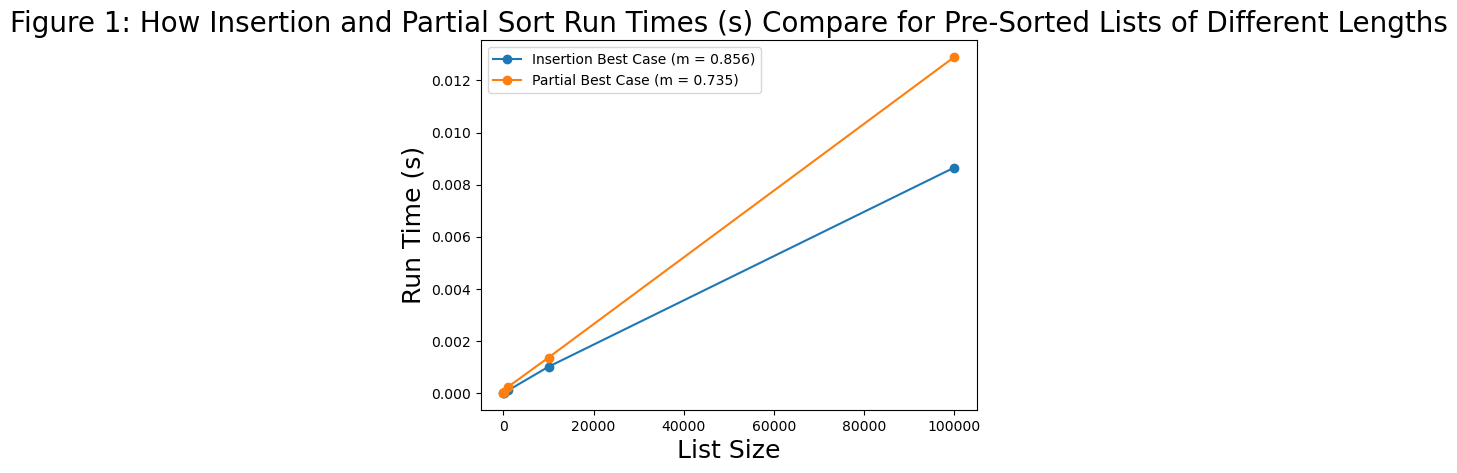

In [20]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# # INCREASE PLOT SIZE
# plt.figure(figuresize = (30, 15))

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, insert_best, label = ('Insertion Best Case (m = ' + "{:.3f}".format(insert_best_slope) + ')'), marker = 'o', linestyle = '-')
ax.plot(list_sizes, partial_best, label = ('Partial Best Case (m = ' + "{:.3f}".format(partial_best_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 1: How Insertion and Partial Sort Run Times (s) Compare for Pre-Sorted Lists of Different Lengths', fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

The following cell creates a line graph to visualize the runtimes for the average case for the insertion and partial sort methods on varying list sizes. This is done using the matplotlib library.

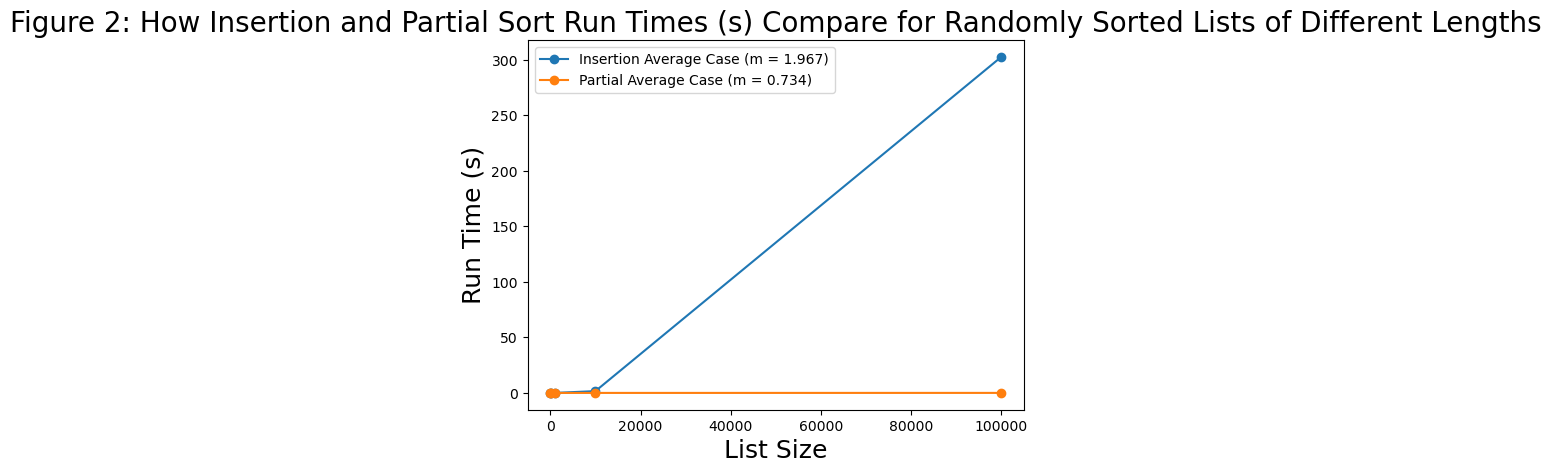

In [21]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# # INCREASE PLOT SIZE
# plt.figure(figuresize = (30, 15))

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, insert_ave, label = ('Insertion Average Case (m = ' + "{:.3f}".format(insert_ave_slope) + ')'), marker = 'o', linestyle = '-')
ax.plot(list_sizes, partial_ave, label = ('Partial Average Case (m = ' + "{:.3f}".format(partial_ave_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 2: How Insertion and Partial Sort Run Times (s) Compare for Randomly Sorted Lists of Different Lengths', fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

The following cell creates a line graph to visualize the runtimes for the worst case for the insertion and partial sort methods on varying list sizes. This is done using the matplotlib library.

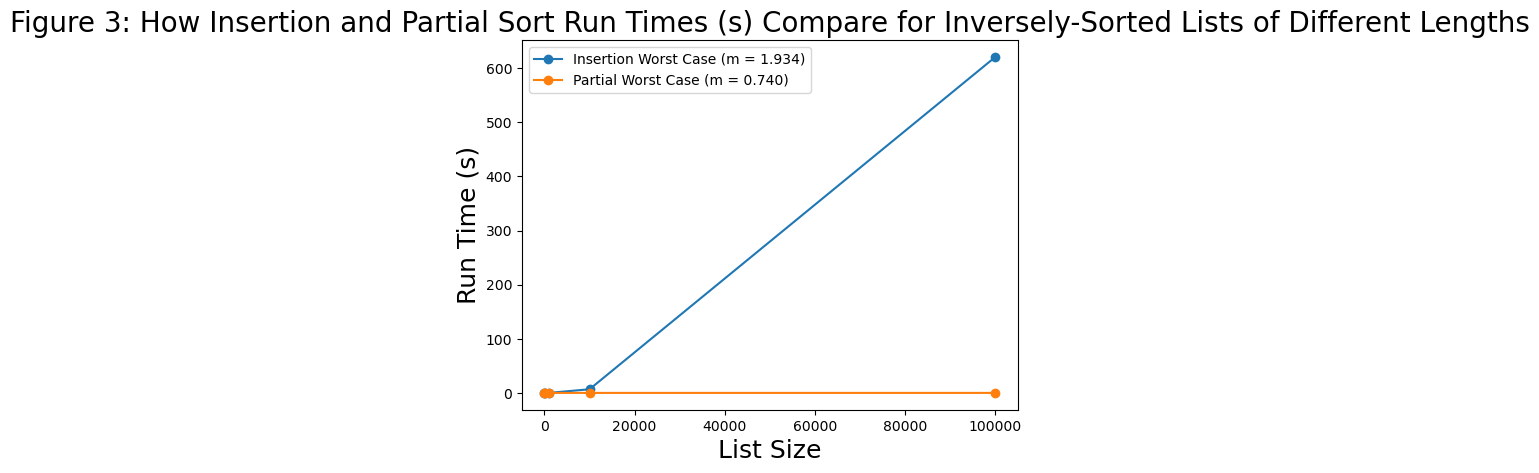

In [22]:
# CREATE FIGURE AND AXIS
fig, ax = plt.subplots()

# # INCREASE PLOT SIZE
# plt.figure(figuresize = (30, 15))

# PLOT DATA AS A LINE GRAPH
ax.plot(list_sizes, insert_worst, label = ('Insertion Worst Case (m = ' + "{:.3f}".format(insert_worst_slope) + ')'), marker = 'o', linestyle = '-')
ax.plot(list_sizes, partial_worst, label = ('Partial Worst Case (m = ' + "{:.3f}".format(partial_worst_slope) + ')'), marker = 'o', linestyle = '-')

# SET AXIS LABELS AND TITLE
ax.set_xlabel('List Size', fontsize = 18)
ax.set_ylabel('Run Time (s)', fontsize = 18)
ax.set_title('Figure 3: How Insertion and Partial Sort Run Times (s) Compare for Inversely-Sorted Lists of Different Lengths', fontsize = 20)

# ADD LEGEND
ax.legend()

# SHOW
plt.show()

**Comparison Table:**

Using the slope to run time conversion table provided in the lab 1 manual, it is possible to analyze the run time functions for each algorithm for each case.

#### Table 1: The Theoretical & Estimated Run Time Functions for Insertion and Partial Sort Algorithms for each case
| Algorithm | Test Case | Slope (m) | Theoretical Run Time Functions | Estimated Run Time Functions |
|-----------|-----------|-----------|--------------------------------|------------------------------|
| Insertion | Best      | $0.856$   | $O(n)$                         | $O(log n)$                   |                     
| Insertion | Average   | $1.967$   | $O(n^2)$                       | $O(n log n)$                 | 
| Insertion | Worst     | $1.934$   | $O(n^2)$                       | $O(n log n)$                 |                    
| Partial   | Best      | $0.735$   | $O(n)$                         | $O(log n)$                   |                     
| Partial   | Average   | $0.734$   | $O(n)$                         | $O(log n)$                   |                    
| Partial   | Worst     | $0.740$   | $O(n^2)$                       | $O(log n)$                   |                     

** Theoretical run time estimations for partial sort assume that the random index approximately splits the list in half.

### Conclusion: